In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random 
from kneed import KneeLocator

The dataset used is xclara and can be found on kaggle

In [150]:
data0 = pd.read_csv("xclara.csv")

In [151]:
data=data0.to_numpy()


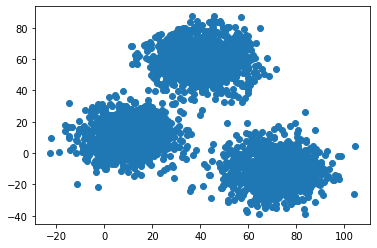

In [152]:
plt.scatter(data[:,0],data[:,1])
plt.show()

Since it's unsupervised learning i decided not to split the data into train and test set but i am not sure if this is the right thing to do. Also splitting the data had a negative effect ,in the training set sometimes a whole class would not be included  but it would be included in the testing set so that would make us choose an inaccurate number of clusters k while training the model.

In [153]:
# n=int(data.shape[0]*0.7)

# random.shuffle(data)

# plt.scatter(data[:,0],data[:,1])
# plt.title('full set')
# plt.show()

# data_train = data[:n]
# data_test = data[n+1:]

# plt.scatter(data_train[:,0],data_train[:,1])
# plt.title('training set')
# plt.show()

# plt.scatter(data_test[:,0],data_test[:,1])
# plt.title('testing set')
# plt.show()

In [158]:
class kmeans:
    def __init__(self):
        self.distortion=[0]# will contain distortion according to the number of clsters(the index is the number of clusters (k))
        self.centres_list=[[None]]# will contain arrays each contains the optimal centroids for all the k possibilities also the index is the number of clusters ( k)
        self.k=0 #number of clusters
        self.centres=np.zeros((self.k,data.shape[1]),float)# optimal centroid according to the optimal number of clusters
        self.clusters =[] #result of clustering contains integers representing the different clusters and linked to the data by the index
        
    def distance(self,data): #comptes euclidien distance
        dist = np.zeros((data.shape[0],self.k),int)
        a=np.zeros((data.shape[0],data.shape[1]))
        for i in range(self.k):
            a=data - self.centres[i,:]
            dist_euc=np.square(a)           
            dist[:,i]=np.sum(dist_euc,axis=1)
        dist=np.sqrt(dist)
        return dist
    
    def Update_params(self,data):#updates centres by calculating the mean of each cluster
        data_sum=np.zeros((self.k,data.shape[1]),float)       
        data_index=np.zeros(self.k,int) 
        
        for i in range(len(self.clusters)):
            data_sum[self.clusters[i]] = data_sum[self.clusters[i]] + data[i]
            data_index[self.clusters[i]]= data_index[self.clusters[i]] + 1

        for i in range(self.k):
            data_sum[i]=data_sum[i]/data_index[i]
        
        self.centres=data_sum
     
      
    def train(self, data):#used to choose the best number of clusters depending on the dataset and the optimal centroids for the chosen configuration
                          # also plot the elbow method figure 
                          # k is tested for values in [1..10]
        for e in range(1,10):
            self.k=e
            index = np.random.permutation(data.shape[0])
            self.centres = data[index[:self.k]]
            for iteration in range(1000):
                centres_anciens=self.centres
                distance = self.distance(data)
                self.clusters= np.argmin(distance,axis =1)
                self.Update_params(data)
                if np.all(self.centres == centres_anciens):
                    break 
            self.centres_list.append(self.centres)
            incluster_distance=np.zeros((data.shape[0],1),float)
            for i in range(len(self.clusters)):
                incluster_distance[i]=np.sqrt((np.sum(np.square(data[i,:]- self.centres_list[e][int(self.clusters[i])]),axis=0)))
            self.distortion.append(np.sum(incluster_distance,axis=0)) 
        dist=[]
        for e in range(1,len(self.distortion)):
            dist.append(self.distortion[e][0])
        k_list=list(range(1,10))
        plt.xlabel('k')
        plt.ylabel('Distortion')
        plt.plot(k_list,dist)
        plt.show()
        kn = KneeLocator(k_list, dist,curve='convex', direction='decreasing')
        self.k=kn.knee
        print('The number of clusters is : ',kn.knee)
        self.centres=self.centres_list[self.k]
            
 

    def infer(self, data):#will do the clustering and scatter plot the result
        distance = self.distance(data)
        self.clusters=np.argmin(distance,axis=1)
        result_mat=np.zeros((len(self.clusters),data.shape[1]+1),float)
        for e in range(len(self.clusters)):
            result_mat[e,:data.shape[1]]=data[e,:]
            result_mat[e,data.shape[1]]=self.clusters[e]    
    
        df=pd.DataFrame(result_mat)       
        df.plot.scatter(0, 1, c=data.shape[1], colormap='jet')
        

            


In [159]:
model =kmeans()

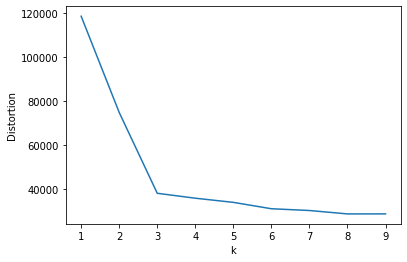

The number of clusters is :  3


In [160]:
model.train(data);

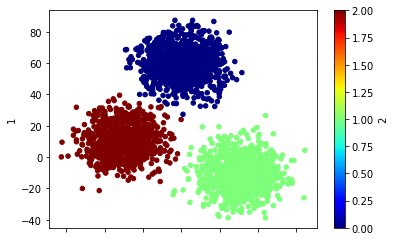

In [157]:
model.infer(data)